# Importing Packages and Setting Global Figure Settings

In [1]:
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import *
%pylab inline

C:\Users\MatheusCF\Anaconda\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Populating the interactive namespace from numpy and matplotlib


C:\Users\MatheusCF\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['cosh', 'ldexp', 'hypot', 'tan', 'isnan', 'log', 'fabs', 'floor', 'sqrt', 'frexp', 'degrees', 'pi', 'log10', 'sin', 'modf', 'copysign', 'cos', 'ceil', 'isinf', 'sinh', 'trunc', 'expm1', 'e', 'tanh', 'radians', 'fmod', 'exp', 'log1p', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
pylab.rcParams['figure.figsize'] = (10, 5)
pylab.rcParams['xtick.labelsize'] = 16
pylab.rcParams['ytick.labelsize'] = 16
pylab.rcParams['axes.labelsize'] = 20
pylab.rcParams['legend.fontsize'] = 20
pylab.rcParams['axes.titlesize'] = 24
pylab.rcParams['legend.frameon'] = True 

# Diagonal Separation Parametrization Linear

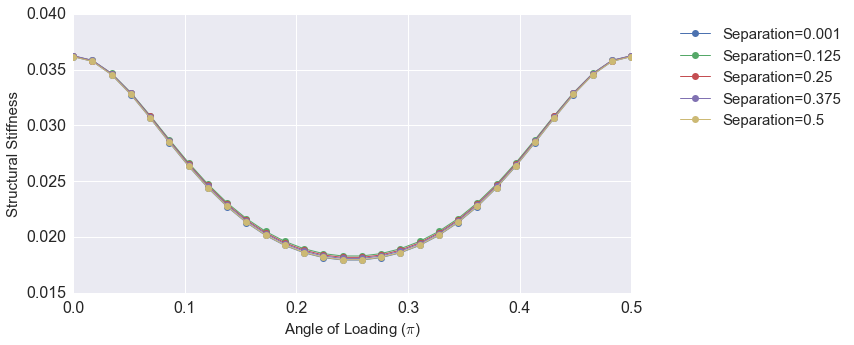

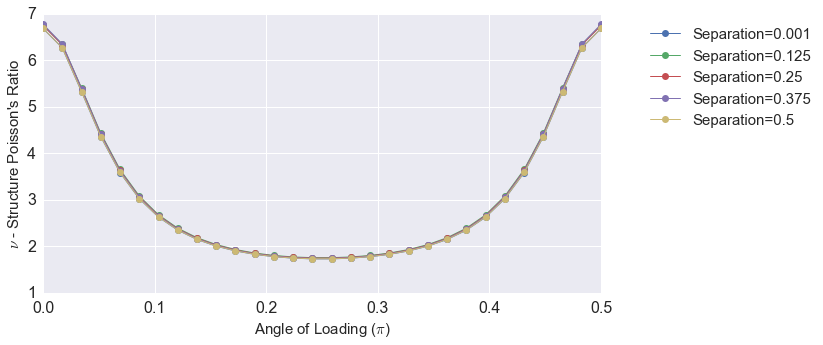

In [4]:
path='Diagonal Separation Linear/'

for j in xrange(5):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_D_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

    file = open(path+'ParametrizedDiag'+str(j)+'_RF_Output.txt', 'rb')
    table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

    file.close()

    Separation=table1[1,1]
    THETA=np.radians(table1[:,2])

    DXX=table1[:,3]
    DXY=table1[:,4]
    DYX=table1[:,5]
    DYY=table1[:,6]

    RFXX=table2[:,3]
    RFXY=table2[:,4]
    RFYX=table2[:,5]
    RFYY=table2[:,6]
    
    ETemp=np.array([])
    NuTemp=np.array([])
    THETATemp=np.array([])
    for i in xrange(len(THETA)):
        THETATemp=np.append(THETATemp,THETA[i]/pi)
        ETemp=np.append(ETemp,RFYY[i]/DYY[i])
        NuTemp=np.append(NuTemp,-DYY[i]/DXX[i])
    if j==0:E=[ETemp];Nu=[NuTemp]
    else: E=np.append(E,[ETemp],axis=0);Nu=np.append(Nu,[NuTemp],axis=0)
    plt.figure(1)
    plt.plot(THETATemp,ETemp,'-o',label='Separation='+str(Separation),lw=1)
    plt.figure(2)
    plt.plot(THETATemp,NuTemp,'-o',label='Separation='+str(Separation),lw=1)

plt.figure(1)
sns.set(font_scale=1.5)
plt.xlabel(r'Angle of Loading ($\pi$)',fontsize=15)
plt.ylabel(r'Structural Stiffness',fontsize=15)
plt.legend(bbox_to_anchor=(1.4, 1))


plt.figure(2)
sns.set(font_scale=1.5)
plt.xlabel(r'Angle of Loading ($\pi$)',fontsize=15)
plt.ylabel(r"$\nu$ - Structure Poisson's Ratio",fontsize=15)
plt.legend(bbox_to_anchor=(1.4, 1))

# Boundary Condition Parametrization

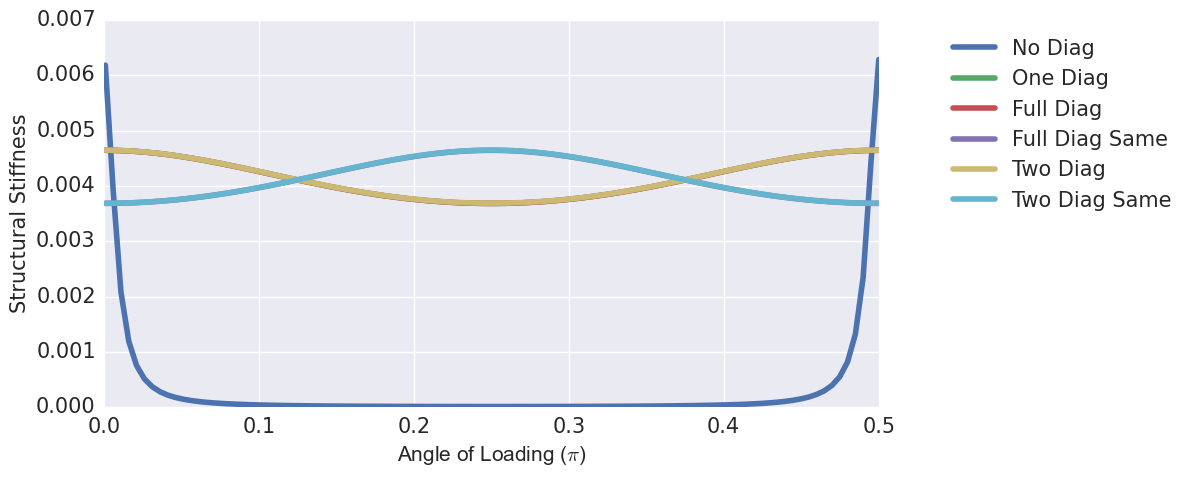

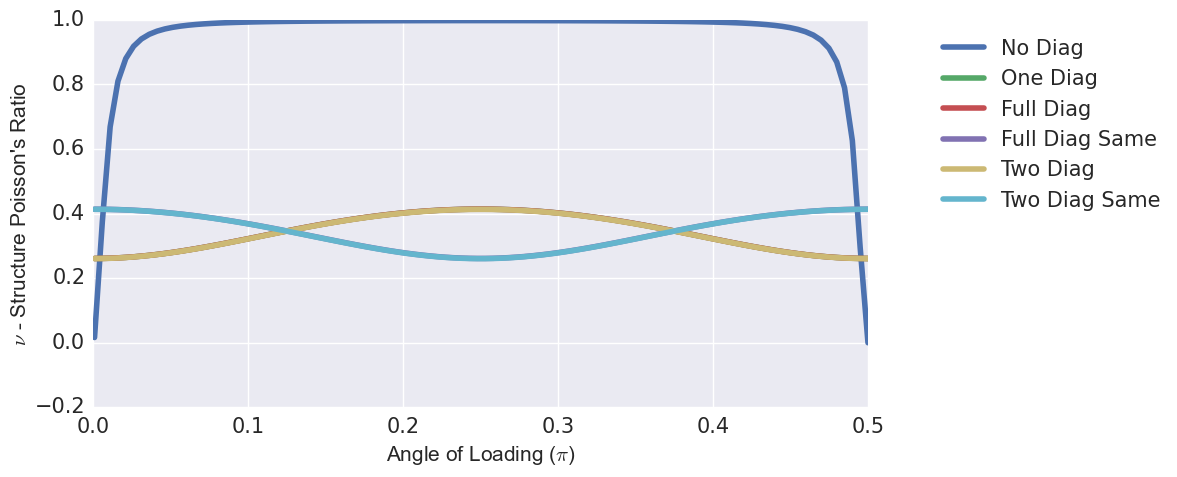

In [85]:
path='../Unitcell Parametric Boundary Condition/LinearV1/'


file = open(path+'noDiag_Output.txt', 'rb')
table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'oneDiag_Output.txt', 'rb')
table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'fullDiag_Output.txt', 'rb')
table3 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'fullDiagSame_Output.txt', 'rb')
table4 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'twoDiag_Output.txt', 'rb')
table5 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file = open(path+'twoDiagSame_Output.txt', 'rb')
table6 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

file.close()

table=np.array([table1,table2,table3,table4,table5,table6])

THETA=table[:,:,1]
DXX=table[:,:,2]
DXY=table[:,:,3]
DYX=table[:,:,4]
DYY=table[:,:,5]

D=np.array([])
Nu=np.array([])
for j in xrange(6):
    DTemp=[]
    NuTemp=[]
    for i in xrange(len(THETA[j])):
        R=np.array([[cos(-THETA[j,i]),-sin(-THETA[j,i])],[sin(-THETA[j,i]),cos(-THETA[j,i])]])
        SIGMA=np.array([[DXX[j,i],DXY[j,i]],[DYX[j,i],DYY[j,i]]])
        SIGMA=np.dot(np.dot(R.transpose(),SIGMA),R)
        DTemp.append([THETA[j,i]/pi,SIGMA[0,0]])
        NuTemp.append([THETA[j,i]/pi,-SIGMA[1,1]/SIGMA[0,0]])
    if j==0:D=[DTemp];Nu=[NuTemp]
    else: D=np.append(D,[DTemp],axis=0);Nu=np.append(Nu,[NuTemp],axis=0)

sns.set(font_scale=1.5)
plt.figure()

plt.plot(D[0,:,0],-1/D[0,:,1],label='No Diag',lw=4)
plt.plot(D[1,:,0],-1/D[1,:,1],label='One Diag',lw=4)
plt.plot(D[2,:,0],-1/D[2,:,1],label='Full Diag',lw=4)
plt.plot(D[3,:,0],-1/D[3,:,1],label='Full Diag Same',lw=4)
plt.plot(D[4,:,0],-1/D[4,:,1],label='Two Diag',lw=4)
plt.plot(D[5,:,0],-1/D[5,:,1],label='Two Diag Same',lw=4)

plt.xlabel(r'Angle of Loading ($\pi$)',fontsize=15)
plt.ylabel(r'Structural Stiffness',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)

plt.figure()
plt.plot(Nu[0,:,0],Nu[0,:,1],label='No Diag',lw=4)
plt.plot(Nu[1,:,0],Nu[1,:,1],label='One Diag',lw=4)
plt.plot(Nu[2,:,0],Nu[2,:,1],label='Full Diag',lw=4)
plt.plot(Nu[3,:,0],Nu[3,:,1],label='Full Diag Same',lw=4)
plt.plot(Nu[4,:,0],Nu[4,:,1],label='Two Diag',lw=4)
plt.plot(Nu[5,:,0],Nu[5,:,1],label='Two Diag Same',lw=4)

plt.xlabel(r'Angle of Loading ($\pi$)',fontsize=15)
plt.ylabel(r"$\nu$ - Structure Poisson's Ratio",fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')

plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)


# Mass Parametrization

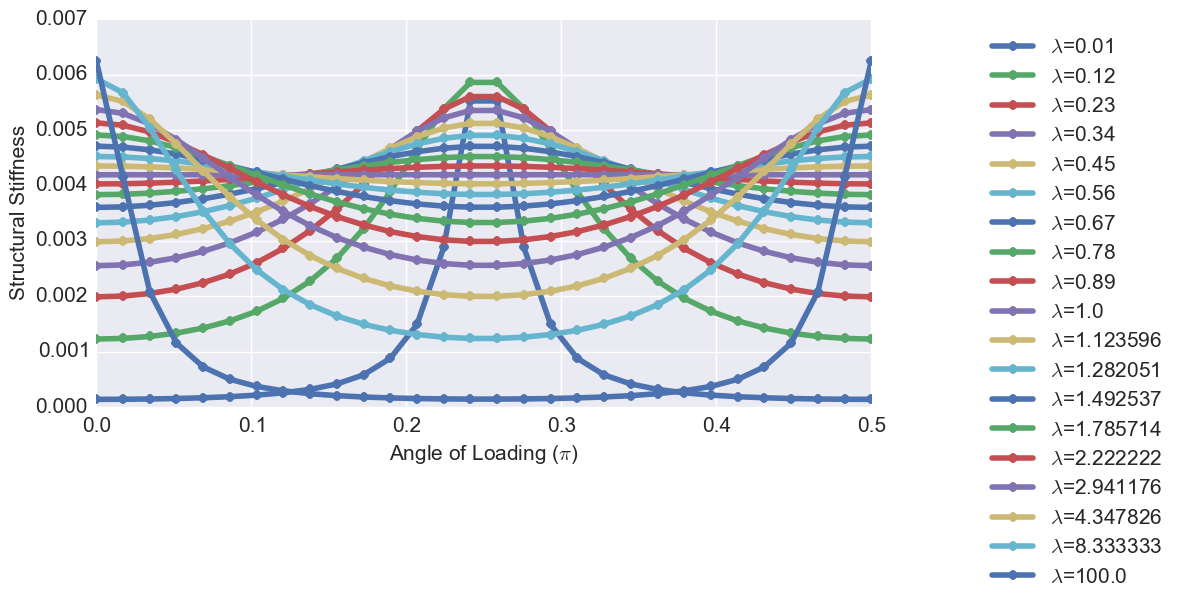

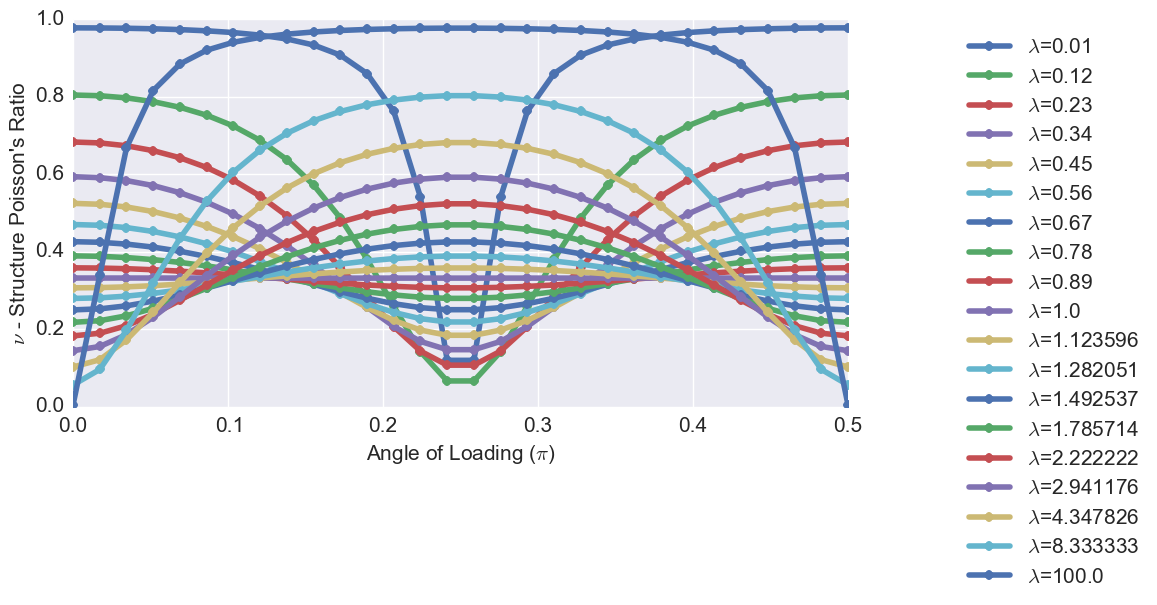

In [20]:
path='../Unitcell Parametric Mass Distribution/LinearV1_StrainControlled/'

#parameters
AREA=100.

#parsing the data to respective arrays

E=np.array([])
Nu=np.array([])
plt.figure()

for j in xrange(0,19):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_D_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

    file = open(path+'ParametrizedDiag'+str(j)+'_RF_Output.txt', 'rb')
    table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))

    file.close()
    
    MASSFRACTION=table1[1,1]
    X2=table1[1,2]
    THETA=np.radians(table1[:,3])

    DXX=table1[:,4]
    DXY=table1[:,5]
    DYX=table1[:,6]
    DYY=table1[:,7]

    SXX=table2[:,4]
    SXY=table2[:,5]
    SYX=table2[:,6]
    SYY=table2[:,7]


    
    ETemp=np.array([])
    NuTemp=np.array([])
    THETATemp=np.array([])
    for i in xrange(len(THETA)):
#         R=np.array([[cos(-THETA[i]),-sin(-THETA[i])],[sin(-THETA[i]),cos(-THETA[i])]])
        EPS=np.array([[DXX[i],DXY[i]],[DYX[i],DYY[i]]])
        SIGMA=np.array([[SXX[i],SXY[i]],[SYX[i],SYY[i]]])/AREA
        
#         EPS=np.dot(np.dot(R.transpose(),EPS),R)
#         SIGMA=np.dot(np.dot(R.transpose(),SIGMA),R)
        THETATemp=np.append(THETATemp,THETA[i]/pi)
        ETemp=np.append(ETemp,[SIGMA[1,1]/EPS[1,1]])
        NuTemp=np.append(NuTemp,[-EPS[0,0]/EPS[1,1]])
    if j==0:E=[ETemp];Nu=[NuTemp]
    else: E=np.append(E,[ETemp],axis=0);Nu=np.append(Nu,[NuTemp],axis=0)
    plt.figure(1)
    plt.plot(THETATemp,ETemp,'-o',label=r'$\lambda$='+str(MASSFRACTION),lw=4)
    plt.figure(2)
    plt.plot(THETATemp,NuTemp,'-o',label=r'$\lambda$='+str(MASSFRACTION),lw=4)

    

plt.figure(1)
sns.set(font_scale=1.5)

# plt.plot(E[1,:,0],E[1,:,1],'-o',label='No Diag',lw=4)
# plt.plot(D[0,:,0],-np.cos(D[0,:,0]*pi),label='No Diag',lw=4)
plt.xlabel(r'Angle of Loading ($\pi$)',fontsize=15)
plt.ylabel(r'Structural Stiffness',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)



plt.figure(2)

# plt.plot(Nu[0,:,0],Nu[0,:,1],label='No Diag',lw=4)
plt.xlabel(r'Angle of Loading ($\pi$)',fontsize=15)
plt.ylabel(r"$\nu$ - Structure Poisson's Ratio",fontsize=15)
# # plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)

# Obtaining Critical Buckling Strain

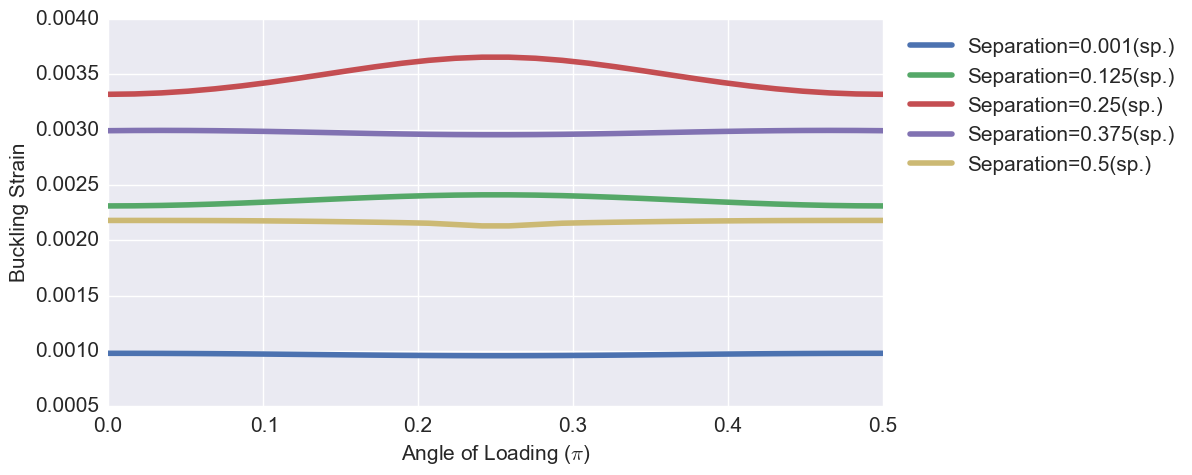

In [51]:
path='../Unitcell Parametric Obtaining Critical Buckling Strain/LinearV1/'

#parsing the data to respective arrays

plt.figure()

for j in xrange(0,5):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_Freq_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file.close()
    
    MASSFRACTION=table1[1,0]
    X2=table1[1,1]
    THETA=np.radians(table1[:,2])/pi
    Freq=table1[:,3]

    plt.plot(THETA,Freq,'-',label=r'Separation='+str(X2)+'(sp.)',lw=4)

    

sns.set(font_scale=1.5)

# plt.plot(E[1,:,0],E[1,:,1],'-o',label='No Diag',lw=4)
# plt.plot(D[0,:,0],-np.cos(D[0,:,0]*pi),label='No Diag',lw=4)
plt.xlabel(r'Angle of Loading ($\pi$)',fontsize=15)
plt.ylabel(r'Buckling Strain',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)




# Obtaining Critical Buckling Strain As Function of Separation

Maximum buckling strain occurs at 0.2562863 spacing.
Sponge Spacing is 0.292893218813 spacing.


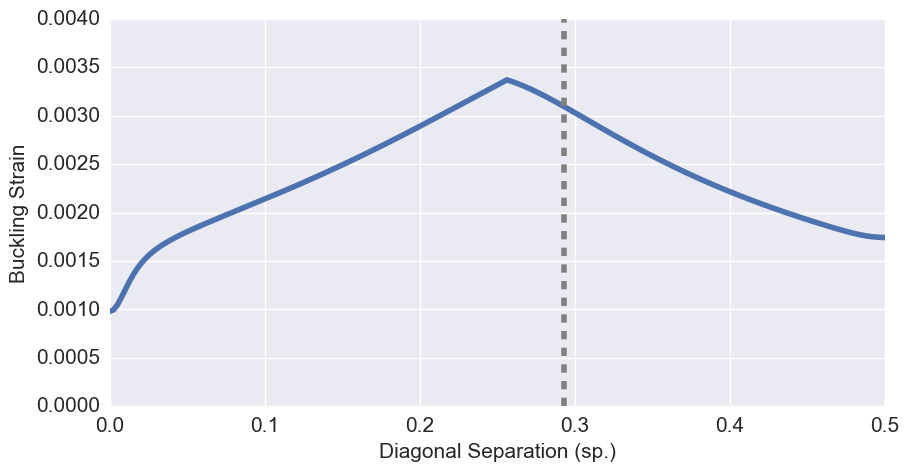

In [148]:
path='../Unitcell Parametric Obtaining Critical Buckling Strain/LinearV1_SeparationTest2/'

#parsing the data to respective arrays


FreqAll=[]
X2All=[]
for j in xrange(0,200):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_Freq_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file.close()
    
    MASSFRACTION=table1[0,0]
    X2=table1[0,1]
    THETA=np.radians(table1[:,2])/pi
    Freq=table1[0,3]
    FreqAll.append(Freq)
    X2All.append(X2)


plt.figure()
plt.plot(X2All,FreqAll,'-',lw=4)
plt.plot([1./(sqrt(2.)+2.),1./(sqrt(2)+2)],[0,0.004],'--',lw=4,color = '0.5')

sns.set(font_scale=1.5)

# plt.plot(E[1,:,0],E[1,:,1],'-o',label='No Diag',lw=4)
# plt.plot(D[0,:,0],-np.cos(D[0,:,0]*pi),label='No Diag',lw=4)
plt.xlabel(r'Diagonal Separation (sp.)',fontsize=15)
plt.ylabel(r'Buckling Strain',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)
# plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)
print "Maximum buckling strain occurs at",X2All[np.argmax(FreqAll)],"spacing."
print "Sponge Spacing is",1./(sqrt(2.)+2.),"spacing."

# Comparing the different size domains

Maximum buckling strain occurs at 0.2575806 spacing for repitition 3
Maximum buckling strain occurs at 0.2575806 spacing for repitition 4
Maximum buckling strain occurs at 0.2575806 spacing for repitition 5
Maximum buckling strain occurs at 0.2575806 spacing for repitition 6
Maximum buckling strain occurs at 0.2575806 spacing for repitition 7
Maximum buckling strain occurs at 0.2575806 spacing for repitition 8
Maximum buckling strain occurs at 0.2575806 spacing for repitition 9


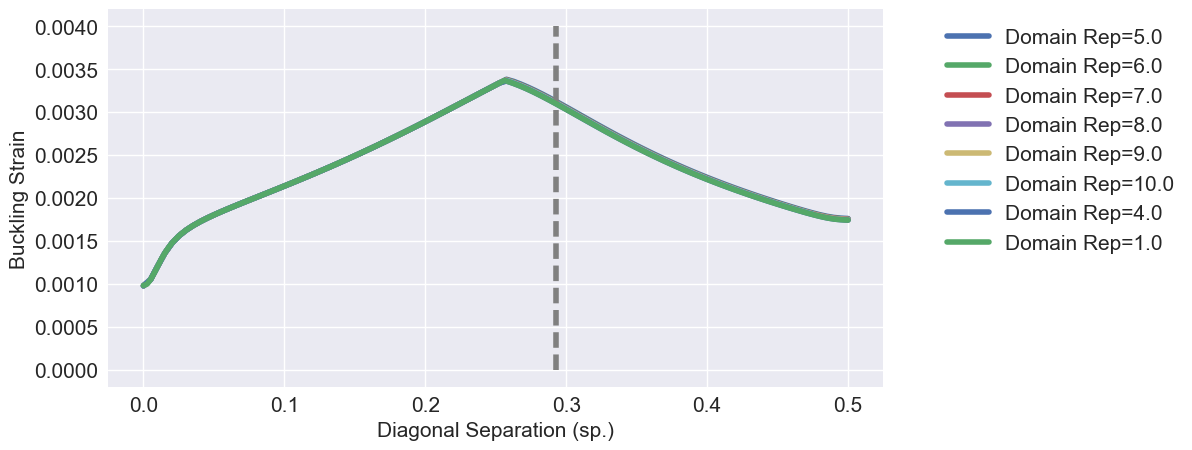

In [11]:
path='../Unitcell Parametric Obtaining Critical Buckling Strain/LinearV1_SeparationTest_VaryingDomainSize/'

#parsing the data to respective arrays


plt.figure()
for j in xrange(3,10):
    #importing the data from the files
    file = open(path+'ParametrizedDiag'+str(j)+'_Freq_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file.close()
    
    MASSFRACTION=table1[:,0]
    X2=table1[:,1]
    THETA=np.radians(table1[:,2])/pi
    DOMAINREP=table1[:,3]
    Freq=table1[:,4]
    print "Maximum buckling strain occurs at",X2[np.argmax(Freq)],"spacing for repitition",j
    
    plt.plot(X2,Freq,'-',label=r'Domain Rep='+str(DOMAINREP[0]),lw=4)
    
plt.plot([1./(sqrt(2.)+2.),1./(sqrt(2)+2)],[0,0.004],'--',lw=4,color = '0.5')
plt.plot(X2All,FreqAll,'-',label=r'Domain Rep=1.0',lw=4)

sns.set(font_scale=1.5)

# plt.plot(E[1,:,0],E[1,:,1],'-o',label='No Diag',lw=4)
# plt.plot(D[0,:,0],-np.cos(D[0,:,0]*pi),label='No Diag',lw=4)
plt.xlabel(r'Diagonal Separation (sp.)',fontsize=15)
plt.ylabel(r'Buckling Strain',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)

Maximum buckling strain occurs at 0.2575806 spacing.
Sponge spacing is 0.292893218813 spacing.


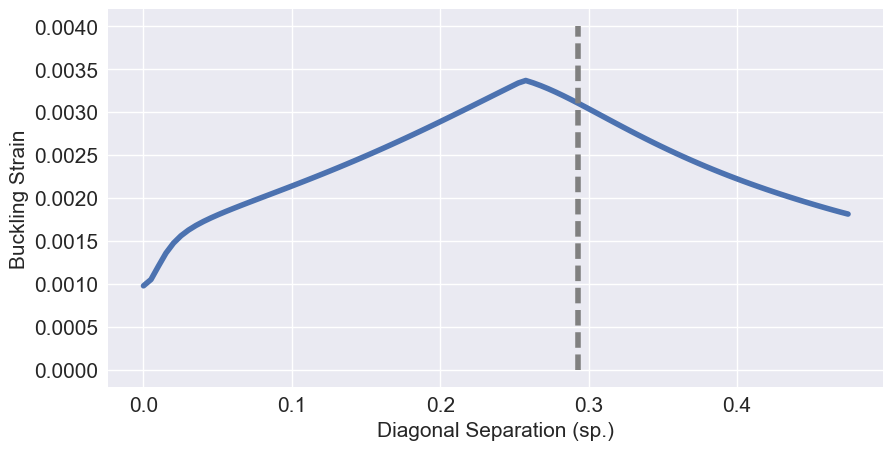

In [12]:
path='../Unitcell Parametric Obtaining Critical Buckling Strain/LinearV1_SeparationTest_VaryingDomainSize/'


#importing the data from the files
file = open(path+'ParametrizedDiag'+str(8)+'_Freq_Output.txt', 'rb')
table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file.close()

MASSFRACTION=table1[:,0]
X2=table1[:,1]
THETA=np.radians(table1[:,2])/pi
DOMAINREP=table1[:,3]
Freq=table1[:,4]

plt.plot(X2,Freq,'-',label=r'Domain Rep='+str(DOMAINREP[0]),lw=4)
    
plt.plot([1./(sqrt(2.)+2.),1./(sqrt(2)+2)],[0,0.004],'--',lw=4,color = '0.5')

sns.set(font_scale=1.5)

# plt.plot(E[1,:,0],E[1,:,1],'-o',label='No Diag',lw=4)
# plt.plot(D[0,:,0],-np.cos(D[0,:,0]*pi),label='No Diag',lw=4)
plt.xlabel(r'Diagonal Separation (sp.)',fontsize=15)
plt.ylabel(r'Buckling Strain',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)
# plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)
print "Maximum buckling strain occurs at",X2[np.argmax(Freq)],"spacing."
print "Sponge spacing is",1./(sqrt(2.)+2.),"spacing."

# Different Geometries: OneDiag,Full Diag,TwoDiag

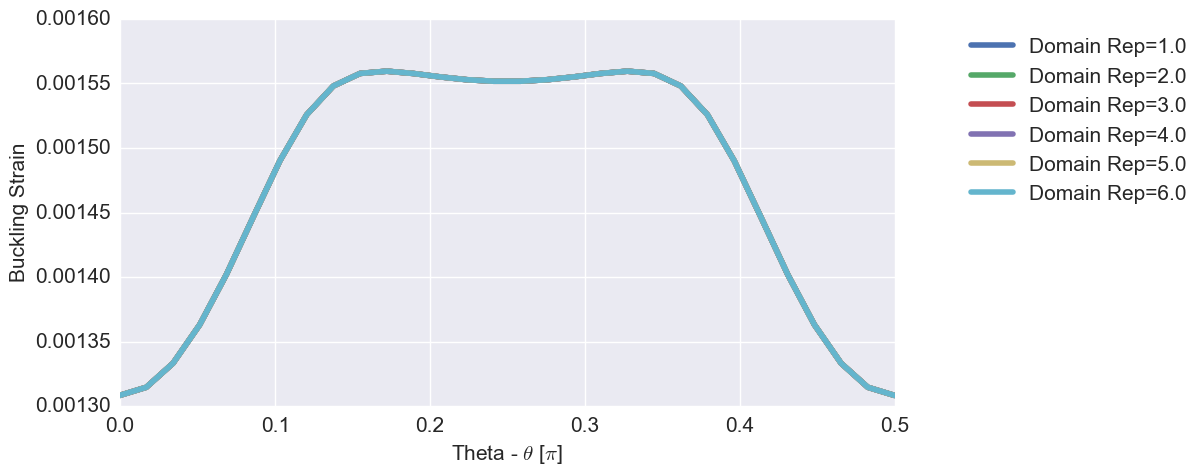

In [4]:
path='../Unitcell Parametric Obtaining Critical Buckling Strain/LinearV1_DifferentGeoms_VaryingDomainSize/'

#parsing the data to respective arrays

Geom='FullDiag'

plt.figure()
for j in xrange(0,6):
    #importing the data from the files
    file = open(path+Geom+str(j)+'_Freq_Output.txt', 'rb')
    table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
    file.close()
    
    MASSFRACTION=table1[:,0]
    THETA=np.radians(table1[:,1])/pi
    DOMAINREP=table1[:,2]
    Freq=table1[:,3]
    
    plt.plot(THETA,Freq,'-',label=r'Domain Rep='+str(DOMAINREP[0]),lw=4)
    

sns.set(font_scale=1.5)

# plt.plot(E[1,:,0],E[1,:,1],'-o',label='No Diag',lw=4)
# plt.plot(D[0,:,0],-np.cos(D[0,:,0]*pi),label='No Diag',lw=4)
plt.xlabel(r'Theta - $\theta$ [$\pi$]',fontsize=15)
plt.ylabel(r'Buckling Strain',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)

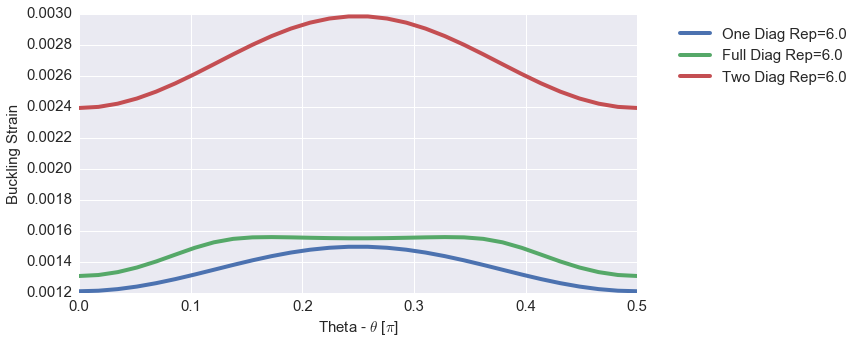

In [12]:
path='../Unitcell Parametric Obtaining Critical Buckling Strain/LinearV1_DifferentGeoms_VaryingDomainSize/'

j=5

file = open(path+"OneDiag"+str(j)+'_Freq_Output.txt', 'rb')
table1 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file.close()
THETA=np.radians(table1[:,1])/pi
DOMAINREP=table1[:,2]
Freq=table1[:,3]
plt.plot(THETA,Freq,'-',label=r'One Diag Rep='+str(DOMAINREP[0]),lw=4)


file = open(path+"FullDiag"+str(j)+'_Freq_Output.txt', 'rb')
table2 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file.close()

THETA=np.radians(table1[:,1])/pi
DOMAINREP=table2[:,2]
Freq=table2[:,3]
plt.plot(THETA,Freq,'-',label=r'Full Diag Rep='+str(DOMAINREP[0]),lw=4)

file = open(path+"TwoDiag"+str(j)+'_Freq_Output.txt', 'rb')
table3 = np.array([row.strip().split(' ') for row in file],dtype=np.dtype(float))
file.close()

THETA=np.radians(table3[:,1])/pi
DOMAINREP=table3[:,2]
Freq=table3[:,3]
plt.plot(THETA,Freq,'-',label=r'Two Diag Rep='+str(DOMAINREP[0]),lw=4)

sns.set(font_scale=1.5)

# plt.plot(E[1,:,0],E[1,:,1],'-o',label='No Diag',lw=4)
# plt.plot(D[0,:,0],-np.cos(D[0,:,0]*pi),label='No Diag',lw=4)
plt.xlabel(r'Theta - $\theta$ [$\pi$]',fontsize=15)
plt.ylabel(r'Buckling Strain',fontsize=15)
# plt.title(r'Linear Planar Unit-cell Uniaxial Stress-Strain')
matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)
plt.legend(bbox_to_anchor=(1.4, 1))
# plt.savefig('Figures/10UniaxialLinearUnit.eps', format='eps', dpi=1000)

# Defining Analytical Solution for Stiffness

In [92]:
# class CalculateStiffness:
#     def __init__(self):
#         self.RF_Total=0.
        
#     def __ComputeA(self):
#         R=self.R
#         self.A=pi*R**2.; self.As=9.*self.A/10.#computing circular shear area
    
#     def __RF_Axial(self):
#         E=self.E; A=self.A
#         if self.Diag:
#              L=self.L; Delta=self.Delta/22.
#         else: 
#              L=self.L; Delta=self.Delta
#         return A*E*Delta/L #axial reaction force
    
#     def __RF_Bending(self): #bending reaction force assuming fully hinged with uniform share displacement
#         E=self.E; nu=self.nu; R=self.R; L=self.L; Delta=self.Delta
#         A=self.A;As=self.As
#         I=pi/4.*R**4.; G=E/(2.*(1.+nu))  #constants computation
#         return 0#A*Delta*((L**3./(12.*E*I))+(L/(G*As)))**(-1)

#     def __Stiffness_Calculation(self,Theta,L,R,Diag):
#         self.Delta=self.Delta_Raw*np.cos(Theta)
#         self.Diag=Diag
#         self.R=R;self.L=L;self.__ComputeA()
#         RF=(np.cos(Theta)*self.__RF_Axial()+np.sin(Theta)*self.__RF_Bending())
#         self.RF_Total=self.RF_Total+RF
        
#     def Initialize_Parameters(self,E,nu,Delta_Raw): #bring in the parameters from the outside
#         self.E=E
#         self.nu=nu
#         self.Delta_Raw=Delta_Raw
        
#     def Set_Structure(self,Data):
#         Theta=Data['Theta']
#         L=Data['L']
#         R=Data['R']
#         Diag=Data['Diag']
#         for i in range(len(Theta)):
#             self.__Stiffness_Calculation(Theta[i],L[i],R[i],Diag[i])
#         print 'Structure Stiffness is:',self.RF_Total/self.Delta_Raw

In [ ]:
def SimpleStiff(thetaall): 
    ST=np.array([2.*A1*E*np.cos(theta*2)**2/(2.*spacing)+
                 2.*A1*E*np.sin(theta*2)**2/(2.*spacing)+
                 2.*A2*E*np.cos(pi/4.+theta*2)*np.sin(pi/4.+theta*2)/(2*spacing*sqrt(2)) for theta in thetaall])
    return ST 

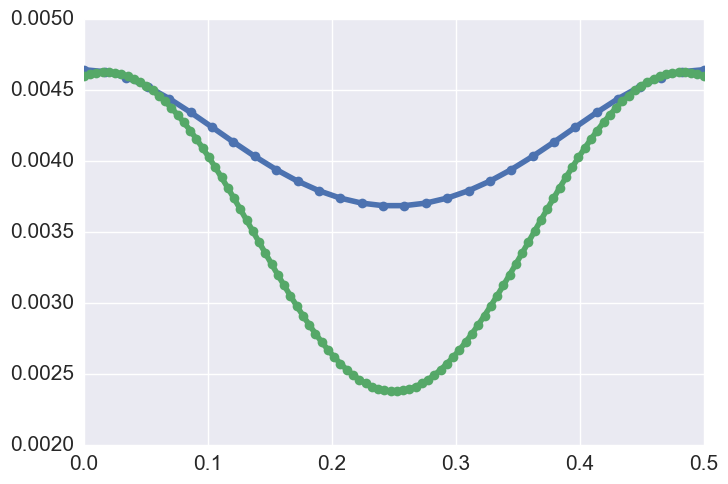

In [147]:
rr=0.1;numberOfDiag=2;numberOfNonDiag=2;spacing=5.

Data={};Data['Theta']=[];Data['L']=[];Data['R']=[];Data['Diag']=[]

kl=sqrt(1./((sqrt(2.)/2.)+1.))

RDiag=rr*kl;REdge=rr*kl

for i in xrange(numberOfDiag):
    Data['L'].append(2*spacing*sqrt(2.))
    Data['R'].append(RDiag)
    Data['Diag'].append(True)
    
for i in xrange(numberOfNonDiag):
    Data['L'].append(spacing*2.)
    Data['R'].append(REdge)
    Data['Diag'].append(False)

class CalculateStiffnessV2:
#     def __init__(self):
        
    def __ComputeA(self):
        self.A=pi*self.R**2.; self.As=9.*self.A/10.#computing circular shear area
    
    def __RF_Axial(self):
        E=self.E; A=self.A
        theta=self.Theta
        
        if self.Diag:
            L=self.L; Delta=self.Delta*np.sin(pi/4.+theta)
            axialF=A*E*(Delta/L)*(np.sin(pi/4.+theta*2)*np.cos(pi/4.+theta*2))
            
        else: 
            L=self.L; Delta=self.Delta
            axialF=A*E*(Delta/L)*(np.cos(theta*2)**2+np.sin(theta*2)**2)
            
        return axialF #axial reaction force
    
    def __RF_Bending(self): #bending reaction force assuming fully hinged with uniform share displacement
        E=self.E; nu=self.nu; R=self.R; L=self.L; Delta=self.Delta
        
        A=self.A;As=self.As
        theta=self.Theta
        
        I=pi/4.*R**4.; G=E/(2.*(1.+nu))  #constants computation
        
        if self.Diag:
            bendF=0#4*A*Delta*(((L/4.)**3./(12.*E*I))+((L/4.)/(G*As)))**(-1.)*np.cos(theta)**2
        else:
            bendF=0#4*A*Delta*(((L/4.)**3./(12.*E*I))+((L/4.)/(G*As)))**(-1.)

        return bendF

    def __Stiffness_Calculation(self,Theta,L,R,Diag):
        self.Delta=self.Delta_Raw
        
        self.Diag=Diag;self.Theta=Theta;self.R=R;self.L=L;self.__ComputeA()
        
        RF=(self.__RF_Axial()+self.__RF_Bending())
        
        self.RF_Total=self.RF_Total+RF
        
    def Initialize_Parameters(self,E,nu,Delta_Raw): #bring in the parameters from the outside
        self.E=E
        self.nu=nu
        self.Delta_Raw=Delta_Raw
        
    def Set_Structure(self,Data,Theta):
        self.RF_Total=0.
        L=Data['L']
        R=Data['R']
        Diag=Data['Diag']
        for i in range(len(L)):
            self.__Stiffness_Calculation(Theta,L[i],R[i],Diag[i])
        return self.RF_Total/self.Delta_Raw

    
    
    
    
Theta=np.linspace(0,0.5,100)*pi

S=CalculateStiffnessV2()
S.Initialize_Parameters(1,0,0.1) #E,nu,Applid Displacement
Stiff=[]
for i in range(len(Theta)):
    Stiff.append(S.Set_Structure(Data,Theta[i]))
plt.plot(THETATemp,ETemp,'-o',label='Numerical',lw=4)
plt.plot(Theta/pi,Stiff,'-o',label='Analytical',lw=4)


Target from numerics is $\sim 0.0465$

In [ ]:
### Caculating critical buckling



In [9]:
rr=0.1
kl=sqrt(1./((sqrt(2.)/2.)+1.))
RDiag=rr*kl/sqrt(2.);REdge=rr*kl

A1=pi*(REdge)**2.;A2=pi*(RDiag)**2; spacing=5.
E=1.
print 2.*A1*E/(2.*spacing)+2.*A2*E*np.cos(pi/4.)/(2*spacing*sqrt(2))

0.00460075592255


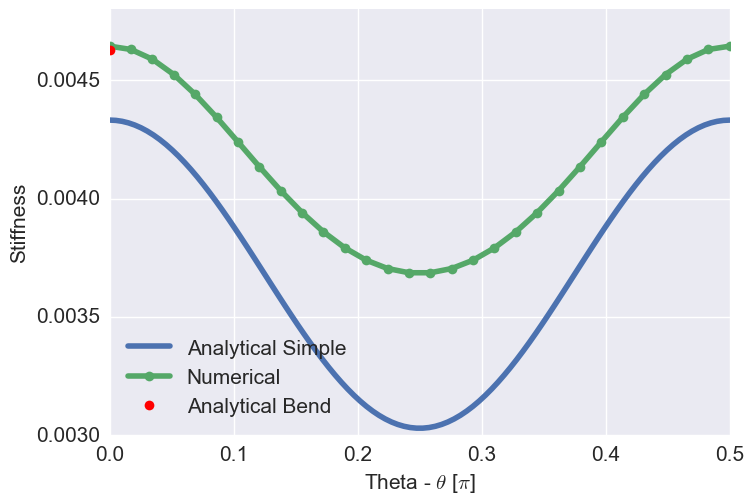

In [12]:


theta=np.linspace(0,0.5,100)*pi
plt.plot(theta/pi,SimpleStiff(theta),label='Analytical Simple',lw=4)
plt.plot(THETATemp,ETemp,'-o',label='Numerical',lw=4)
plt.plot([0],[0.00462699767227],'ro', label='Analytical Bend')
plt.xlabel(r'Theta - $\theta$ [$\pi$]',fontsize=15)
plt.ylabel(r'Stiffness',fontsize=15)
plt.legend(loc=3)

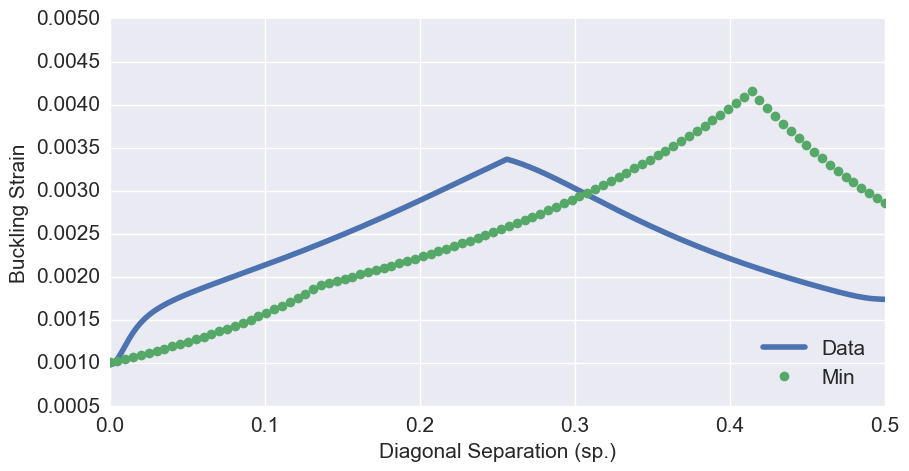

In [215]:
def L1(d): return d*sqrt(2.)/sqrt(2.)
def L2(d): global L; return (L-L3(d))/sqrt(2.)
def L3(d): return d*sqrt(2.)/sqrt(2)
def L4(d): global L; return L-2.*d
def L5(d): return d

E=1.;

R1=0.0707106781187
R2=0.0594603557501

global L; L=5.

I1=pi/4.*R2**4.
I2=pi/4.*R2**4.
I3=pi/4.*R2**4.
I4=pi/4.*R1**4.
I5=pi/4.*R1**4.

A1=pi*R2**2.
A2=pi*R2**2.
A3=pi*R2**2.
A4=pi*R1**2.
A5=pi*R1**2.

dAll=np.linspace(0,L/2.,100)
EpsCr,Pcr1,Pcr2,Pcr3,Pcr4,Pcr5=[],[],[],[],[],[]
for d in dAll:
    
    Pcr1.append(2.046*pi**2.*I1/(L1(d)**2.*A1))
    Pcr2.append(2.046*pi**2.*I2/(L2(d)**2.*A2))
    Pcr3.append(2.046*pi**2.*I3/(L3(d)**2.*A3))
    Pcr4.append(2.046*pi**2.*I4/(L4(d)**2.*A4))
    Pcr5.append(2.046*pi**2.*I5/(L5(d)**2.*A5))
    
    EpsCr.append(min([Pcr1[-1],Pcr2[-1],Pcr3[-1],Pcr4[-1],Pcr5[-1]]))
    

plt.plot(X2All,FreqAll,'-',lw=4,label='Data')

# plt.plot(dAll/L,Pcr1,'o',label='1')
# plt.plot(dAll/L,Pcr2,'o',label='2')
# plt.plot(dAll/L,Pcr3,'o',label='3')
# plt.plot(dAll/L,Pcr4,'o',label='4')
# plt.plot(dAll/L,Pcr5,'o',label='5')


plt.plot(dAll/L,EpsCr,'o',label='Min')
sns.set(font_scale=1.5)


plt.legend(loc=4)

plt.ylim([0.0005,0.005])
plt.xlabel(r'Diagonal Separation (sp.)',fontsize=15)
plt.ylabel(r'Buckling Strain',fontsize=15)

matplotlib.rcParams.update({'font.size': 15})
plt.gcf().set_size_inches(10,5)

In [183]:
spacing=5.
rr=0.1
VT=4.*2.*spacing*pi*rr**2.
MassFraction=1

print 'REDGES',((VT*MassFraction)/(4.*pi*2.*spacing*(MassFraction+1.)))**(1./2.)
print 'RDIAGONALS',((VT)/(4.*sqrt(2.)*pi*2.*spacing*(MassFraction+1.)))**(1./2.)


REDGES 0.0707106781187
RDIAGONALS 0.0594603557501
